In [1]:
#load package
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

In [2]:
# Set work data Type
T = BigFloat
setprecision(128)
;

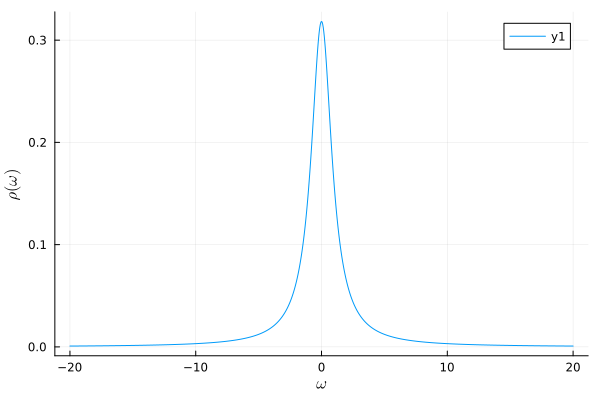

In [3]:
#define spectral function
Lorentzian(x, mu, gamma) = gamma/(pi*((x-mu)^2+gamma^2))
#rho(omega) = 0.5*Lorentzian(omega, -10.0, 0.7) + 0.5*Lorentzian(omega, 10.0, 0.7)
rho(omega) = Lorentzian(omega, 0.0, 1.)
omegas = LinRange(-20, 20, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+5
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
N_real    = 1000  #demension of array of output
omega_max = 100.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [7]:
#construct solver struct
@time sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true)
;

N_imag is setted as 48
H=1
Iter     Function value   Gradient norm 
     0     1.123527e-04     1.438175e-03
 * time: 0.015017032623291016
     1     8.277876e-05     6.784128e-04
 * time: 1.0823020935058594
     2     7.953778e-05     8.152778e-04
 * time: 1.3633899688720703
     3     7.232109e-05     2.854315e-04
 * time: 1.653818130493164
     4     7.116868e-05     4.922579e-05
 * time: 1.79899001121521
     5     7.112179e-05     4.232522e-06
 * time: 2.0058250427246094
     6     7.112125e-05     9.631600e-07
 * time: 2.1121811866760254
     7     7.112124e-05     2.073606e-07
 * time: 2.324395179748535
     8     7.112124e-05     3.937628e-08
 * time: 2.4653379917144775
     9     7.112124e-05     8.384738e-09
 * time: 2.658143997192383
max_theta=0.02622467501976824063108311733743011304082
hardy optimization was success.
 32.790577 seconds (112.86 M allocations: 5.176 GiB, 3.91% gc time, 90.10% compilation time)


In [8]:
#execute optimize
@time Nevanlinna.solve!(sol)

H=1
Iter     Function value   Gradient norm 
     0     7.112124e-05     8.384738e-09
 * time: 0.00019884109497070312
max_theta=0.02622467501976824063108311733743011304082
hardy optimization was success.
H=2
Iter     Function value   Gradient norm 
     0     7.112124e-05     1.110607e-03
 * time: 4.506111145019531e-5
     1     6.280747e-05     6.586969e-04
 * time: 0.5935099124908447
     2     5.593531e-05     3.592734e-04
 * time: 0.8744819164276123
     3     5.487361e-05     2.877399e-04
 * time: 1.1018071174621582
     4     5.456414e-05     2.493354e-04
 * time: 1.3316400051116943
     5     5.443898e-05     2.017857e-04
 * time: 1.4944119453430176
     6     5.425488e-05     1.337715e-04
 * time: 1.720768928527832
     7     5.399761e-05     1.992556e-04
 * time: 1.94016695022583
     8     5.321490e-05     1.113320e-04
 * time: 2.1984241008758545
     9     5.313947e-05     8.716945e-05
 * time: 2.322721004486084
    10     5.308712e-05     7.899141e-05
 * time: 2.47925496101

    71     2.983009e-05     8.420030e-05
 * time: 15.400455951690674
    72     2.980330e-05     1.043129e-04
 * time: 15.57654881477356
    73     2.978518e-05     6.740155e-05
 * time: 15.752710819244385
    74     2.977056e-05     7.280837e-05
 * time: 15.916000843048096
    75     2.976218e-05     4.625922e-05
 * time: 16.082170963287354
    76     2.975505e-05     4.286926e-05
 * time: 16.31180500984192
    77     2.975023e-05     3.646920e-05
 * time: 16.48476791381836
    78     2.974159e-05     5.118979e-05
 * time: 16.709446907043457
    79     2.973141e-05     4.210168e-05
 * time: 16.958427906036377
    80     2.971525e-05     5.447185e-05
 * time: 17.19304895401001
    81     2.969963e-05     3.660087e-05
 * time: 17.354307889938354
    82     2.968359e-05     3.860959e-05
 * time: 17.517308950424194
    83     2.967202e-05     2.875660e-05
 * time: 17.678905963897705
    84     2.966276e-05     2.283349e-05
 * time: 17.853354930877686
    85     2.965641e-05     2.979808e-

   191     2.960246e-05     1.462058e-08
 * time: 36.439435958862305
   192     2.960246e-05     1.412540e-08
 * time: 36.583312034606934
   193     2.960246e-05     1.399858e-08
 * time: 36.75377297401428
   194     2.960246e-05     1.158849e-08
 * time: 36.92813301086426
   195     2.960246e-05     1.331563e-08
 * time: 37.113982915878296
   196     2.960246e-05     9.523880e-09
 * time: 37.29873991012573
max_theta=0.05462665145210501682072791959166334825455
hardy optimization was success.
H=4
Iter     Function value   Gradient norm 
     0     2.960246e-05     3.519348e-04
 * time: 0.00019216537475585938
     1     2.899076e-05     2.711143e-04
 * time: 0.3806431293487549
     2     2.844389e-05     2.283041e-04
 * time: 0.6611611843109131
     3     2.813460e-05     2.453668e-04
 * time: 0.9667911529541016
     4     2.715883e-05     3.137875e-04
 * time: 1.2277610301971436
     5     2.692671e-05     2.438058e-04
 * time: 1.4161710739135742
     6     2.674701e-05     1.591139e-04

   112     2.348574e-05     2.819580e-05
 * time: 23.938221216201782
   113     2.348266e-05     2.902985e-05
 * time: 24.182621002197266
   114     2.347972e-05     2.663335e-05
 * time: 24.459944009780884
   115     2.347687e-05     2.732653e-05
 * time: 24.71979022026062
   116     2.347417e-05     2.468100e-05
 * time: 24.9498770236969
   117     2.347158e-05     2.549818e-05
 * time: 25.128193140029907
   118     2.346913e-05     2.247405e-05
 * time: 25.32375407218933
   119     2.346679e-05     2.361382e-05
 * time: 25.51672101020813
   120     2.346457e-05     2.016211e-05
 * time: 25.70209002494812
   121     2.346244e-05     2.173467e-05
 * time: 25.889941215515137
   122     2.346042e-05     2.034511e-05
 * time: 26.121198177337646
   123     2.345845e-05     1.990395e-05
 * time: 26.38520312309265
   124     2.345655e-05     2.191380e-05
 * time: 26.554283142089844
   125     2.345466e-05     1.814211e-05
 * time: 26.748367071151733
   126     2.345281e-05     2.334443e-05


   232     2.328310e-05     2.635155e-05
 * time: 46.94881820678711
   233     2.328204e-05     2.533894e-05
 * time: 47.13286018371582
   234     2.328099e-05     2.632510e-05
 * time: 47.31841516494751
   235     2.327994e-05     2.486435e-05
 * time: 47.508607149124146
   236     2.327890e-05     2.622345e-05
 * time: 47.663217067718506
   237     2.327787e-05     2.448446e-05
 * time: 47.849061012268066
   238     2.327685e-05     2.603760e-05
 * time: 48.035309076309204
   239     2.327584e-05     2.431222e-05
 * time: 48.2233772277832
   240     2.327485e-05     2.575960e-05
 * time: 48.409996032714844
   241     2.327386e-05     2.434378e-05
 * time: 48.59633922576904
   242     2.327289e-05     2.567905e-05
 * time: 48.78550910949707
   243     2.327193e-05     2.431177e-05
 * time: 48.93542122840881
   244     2.327099e-05     2.574233e-05
 * time: 49.1346960067749
   245     2.327007e-05     2.448700e-05
 * time: 49.32349920272827
   246     2.326917e-05     2.575817e-05
 * t

   353     2.319197e-05     3.517002e-05
 * time: 70.80078601837158
   354     2.319090e-05     3.737018e-05
 * time: 70.95393800735474
   355     2.318982e-05     3.560918e-05
 * time: 71.14124917984009
   356     2.318873e-05     3.761440e-05
 * time: 71.32242107391357
   357     2.318762e-05     3.604973e-05
 * time: 71.51136302947998
   358     2.318650e-05     3.784571e-05
 * time: 71.71446514129639
   359     2.318536e-05     3.648604e-05
 * time: 71.90109705924988
   360     2.318421e-05     3.807286e-05
 * time: 72.08596611022949
   361     2.318303e-05     3.691319e-05
 * time: 72.2720160484314
   362     2.318184e-05     3.830277e-05
 * time: 72.42071104049683
   363     2.318063e-05     3.732705e-05
 * time: 72.60043621063232
   364     2.317940e-05     3.854017e-05
 * time: 72.78687906265259
   365     2.317815e-05     3.772425e-05
 * time: 72.97664523124695
   366     2.317687e-05     3.878756e-05
 * time: 73.1679060459137
   367     2.317557e-05     3.810223e-05
 * time: 

   474     2.302746e-05     4.549974e-05
 * time: 94.45098304748535
   475     2.302634e-05     4.381713e-05
 * time: 94.64440202713013
   476     2.302522e-05     4.555545e-05
 * time: 94.83648300170898
   477     2.302409e-05     4.392615e-05
 * time: 95.02344822883606
   478     2.302296e-05     4.560295e-05
 * time: 95.22672605514526
   479     2.302183e-05     4.403402e-05
 * time: 95.42567420005798
   480     2.302069e-05     4.564448e-05
 * time: 95.62508702278137
   481     2.301954e-05     4.414198e-05
 * time: 95.7797691822052
   482     2.301839e-05     4.568225e-05
 * time: 95.97455906867981
   483     2.301724e-05     4.425112e-05
 * time: 96.16754412651062
   484     2.301607e-05     4.571835e-05
 * time: 96.36060500144958
   485     2.301490e-05     4.436236e-05
 * time: 96.5500111579895
   486     2.301373e-05     4.575457e-05
 * time: 96.74534511566162
   487     2.301254e-05     4.447632e-05
 * time: 96.94765520095825
   488     2.301134e-05     4.579237e-05
 * time: 

   594     2.287968e-05     4.036670e-05
 * time: 119.62585401535034
   595     2.287870e-05     3.950890e-05
 * time: 119.83980417251587
   596     2.287772e-05     4.015850e-05
 * time: 120.0558750629425
   597     2.287674e-05     3.923825e-05
 * time: 120.27103900909424
   598     2.287577e-05     3.994739e-05
 * time: 120.48452401161194
   599     2.287479e-05     3.895671e-05
 * time: 120.66314315795898
   600     2.287381e-05     3.973506e-05
 * time: 120.87539005279541
   601     2.287283e-05     3.866474e-05
 * time: 121.08516907691956
   602     2.287186e-05     3.952316e-05
 * time: 121.31097102165222
   603     2.287088e-05     3.836299e-05
 * time: 121.50986909866333
   604     2.286990e-05     3.931325e-05
 * time: 121.72561717033386
   605     2.286893e-05     3.805233e-05
 * time: 121.93898415565491
   606     2.286795e-05     3.910676e-05
 * time: 122.14134907722473
   607     2.286697e-05     3.773379e-05
 * time: 122.31609416007996
   608     2.286600e-05     3.89049

   714     2.277069e-05     3.103813e-05
 * time: 144.74761509895325
   715     2.277006e-05     2.697651e-05
 * time: 144.9720230102539
   716     2.276943e-05     3.087258e-05
 * time: 145.1703691482544
   717     2.276880e-05     2.682885e-05
 * time: 145.37367510795593
   718     2.276817e-05     3.070702e-05
 * time: 145.5443160533905
   719     2.276754e-05     2.666683e-05
 * time: 145.76264214515686
   720     2.276692e-05     3.054155e-05
 * time: 146.08256816864014
   721     2.276628e-05     2.648954e-05
 * time: 146.4460551738739
   722     2.276566e-05     3.037624e-05
 * time: 146.72084021568298
   723     2.276502e-05     2.629622e-05
 * time: 146.9857041835785
   724     2.276440e-05     3.021113e-05
 * time: 147.31949520111084
   725     2.276376e-05     2.608632e-05
 * time: 147.50955319404602
   726     2.276314e-05     3.004620e-05
 * time: 147.75356221199036
   727     2.276250e-05     2.585952e-05
 * time: 147.97673916816711
   728     2.276188e-05     2.988140e-0

   834     2.270449e-05     2.607370e-05
 * time: 169.79663801193237
   835     2.270405e-05     2.344651e-05
 * time: 170.00394916534424
   836     2.270363e-05     2.602647e-05
 * time: 170.17893719673157
   837     2.270319e-05     2.339484e-05
 * time: 170.4033281803131
   838     2.270276e-05     2.598076e-05
 * time: 170.64147305488586
   839     2.270231e-05     2.334467e-05
 * time: 170.84773516654968
   840     2.270187e-05     2.593695e-05
 * time: 171.07673811912537
   841     2.270141e-05     2.329661e-05
 * time: 171.29917120933533
   842     2.270096e-05     2.589526e-05
 * time: 171.5117871761322
   843     2.270050e-05     2.325108e-05
 * time: 171.73610019683838
   844     2.270004e-05     2.585578e-05
 * time: 171.9245491027832
   845     2.269957e-05     2.320834e-05
 * time: 172.12548112869263
   846     2.269910e-05     2.581847e-05
 * time: 172.33808016777039
   847     2.269862e-05     2.316848e-05
 * time: 172.541424036026
   848     2.269815e-05     2.578315e-0

   954     2.264523e-05     1.805795e-05
 * time: 195.50716400146484
   955     2.264470e-05     1.560311e-05
 * time: 195.68776106834412
   956     2.264420e-05     1.785544e-05
 * time: 195.90880918502808
   957     2.264366e-05     1.570514e-05
 * time: 196.11264610290527
   958     2.264315e-05     1.766105e-05
 * time: 196.32695508003235
   959     2.264260e-05     1.580194e-05
 * time: 196.53775715827942
   960     2.264208e-05     1.747518e-05
 * time: 196.75232601165771
   961     2.264153e-05     1.589321e-05
 * time: 196.95437502861023
   962     2.264099e-05     1.729817e-05
 * time: 197.12479710578918
   963     2.264043e-05     1.597860e-05
 * time: 197.33109712600708
   964     2.263989e-05     1.713025e-05
 * time: 197.5246820449829
   965     2.263932e-05     1.605778e-05
 * time: 197.73967218399048
   966     2.263877e-05     1.697155e-05
 * time: 197.946759223938
   967     2.263819e-05     1.613037e-05
 * time: 198.1558871269226
   968     2.263764e-05     1.701152e-

In [9]:
wo_sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

N_imag is setted as 48


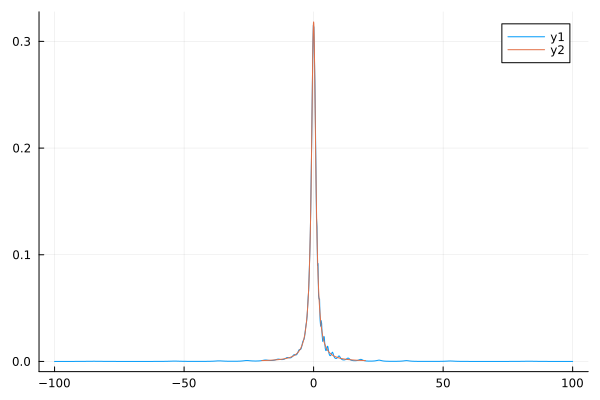

In [14]:
plot()
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi)
#plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val))/pi)
plot!(omegas, rho.(omegas))
#savefig("picture.png")

In [11]:
#=
plot(xlim = [-6,6],
    legend = :topright,
    #ymirror = true, 
    xticks = [5,0,-5],
    yticks = [0.3,0,-0.3],
    xtickfont=font(15), 
    ytickfont=font(15), 
    guidefont=font(25), 
    legendfont=font(20))
plot!(xlabel=latexstring("\\omega"))
plot!(ylabel=latexstring("\\rho"))
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val/pi),label="non-opt",lw=3)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val)/pi),label="opt",lw=3)
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)
#savefig("two_peak.svg")
=#

In [15]:
open("data/lorentz_wo_opt.dat","w") do f
    for i in 1:wo_sol.reals.N_real
        println(f, "$(Float64(real.(wo_sol.reals.freq[i])))",  "\t", "$(Float64(imag.(wo_sol.reals.val[i]/pi)))")
    end
end
open("data/lorentz_w_opt.dat","w") do g
    for i in 1:sol.reals.N_real
        println(g, "$(Float64(real.(sol.reals.freq[i])))",  "\t", "$(Float64(imag.(sol.reals.val[i]/pi)))")
    end
end
open("data/lorentz_exact.dat","w") do h
    for i in 1:length(omegas)
        println(h, omegas[i],  "\t", rho(omegas[i]))
    end
end